# Analysis of SAT scores in New York City High Schools

## Introduction/Business Problem

### The purpose of this analysis is to determine the top 5 high schools with the highest scholastic aptitude test (SAT) scores in each New York City (NYC) borough.  The intended audiences for the analysis are parents of soon-to-be or current high schoolers.  This analysis is relevant to parents of soon-to-be high schoolers who intend on taking the SAT to provide guidance in determining the best high school or see if their current high school is a top SAT performer.


## Data

### The data sets used for this analysis will be the New York City Department of Education 2011 School Survey data, Kaggle NYC Schools/SAT dataset and Foursquare API.  The NYC 2011 School Survey will be used to obtain the school identifier (unique school identifier), school type (high school), total number of students, school address, and borough (borough where school is located).  The Kaggle NYC Schools/SAT dataset will be used to obtain various data about the high schools in NYC.  This data includes SAT results, unique school identifiers, school names and addresses, total number of students, and the longitude/latitude of each high school.  The Foursquare API data will be used to map the top SAT performing schools in each borough to visually display where they are located and what venues like bus stops and subway stops are nearby.



In [1]:
# import geopy library for geocoders

!python -m pip install geopy
from geopy.geocoders import Nominatim

In [2]:
# import folium library

!pip install folium
import folium

In [3]:
# import other libraries

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


In [4]:
# import survery data from NYC schools

df_data_1 = pd.read_csv('C:\\Users\\PJ\\Documents\\IBM Data Science_Coursera\\Applied Data Science Capstone Project\\Final Project\\survey_all.csv')
df_data_1.head()


dbn    bn                      schoolname  d75 studentssurveyed  \
0  01M015  M015       P.S. 015 Roberto Clemente    0               No   
1  01M019  M019             P.S. 019 Asher Levy    0               No   
2  01M020  M020            P.S. 020 Anna Silver    0               No   
3  01M034  M034  P.S. 034 Franklin D. Roosevelt    0              Yes   
4  01M063  M063       P.S. 063 William McKinley    0               No   

   highschool                  schooltype  rr_s  rr_t  rr_p    N_s   N_t  \
0         0.0           Elementary School   NaN    88    60    NaN  22.0   
1         0.0           Elementary School   NaN   100    60    NaN  34.0   
2         0.0           Elementary School   NaN    88    73    NaN  42.0   
3         0.0  Elementary / Middle School  89.0    73    50  145.0  29.0   
4         0.0           Elementary School   NaN   100    60    NaN  23.0   

     N_p  nr_s  nr_t  nr_p  saf_p_11  com_p_11  eng_p_11  aca_p_11  saf_t_11  \
0   90.0     0    25   150       8.5       7.6       7.5       7.8       7.5   
1  161.0     0    33   269       8.4       7.6       7.6       7.8       8.6   
2  367.0     0    48   505       8.9       8.3       8.3       8.6       7.6   
3  151.0   163    40   301       8.8       8.2       8.0       8.5       7.0   
4   90.0     0    23   151       8.7       7.9       8.1       7.9       8.4   

   com_t_11  eng_t_11  aca_t_11  saf_s_11  com_s_11  eng_s_11  aca_s_11  \
0       7.8       7.6       7.9       NaN       NaN       NaN       NaN   
1       8.5       8.9       9.1       NaN       NaN       NaN       NaN   
2       6.3       6.8       7.5       NaN       NaN       NaN       NaN   
3       6.2       6.8       7.8       6.2       5.9       6.5       7.4   
4       7.3       7.8       8.1       NaN       NaN       NaN       NaN   

   saf_tot_11  com_tot_11  eng_tot_11  aca_tot_11  p_q2h  p_q7a  p_q7b  p_q7c  \
0         8.0         7.7         7.5         7.9    8.0    8.2    8.3    7.5   
1         8.5         8.1         8.2         8.4    7.7    7.9    8.0    7.3   
2         8.2         7.3         7.5         8.0    8.1    8.8    8.9    8.5   
3         7.3         6.7         7.1         7.9    8.1    8.5    8.8    8.2   
4         8.5         7.6         7.9         8.0    8.0    8.4    8.6    8.0   

   p_q7d  p_q8a  p_q8b  p_q8c  p_q8d  p_q8e  p_q8f  p_q2b  p_q2d  p_q2e  \
0    7.9    6.8    8.7    9.7    8.7    9.9    9.9    7.7    8.3    7.9   
1    7.7    6.5    8.8    9.4    8.7   10.0    9.9    7.5    8.2    7.9   
2    8.4    7.6    9.2    9.4    9.2    9.8    9.7    8.4    8.8    8.5   
3    8.3    7.3    9.2    9.4    9.1    9.8    9.7    8.3    8.7    8.3   
4    8.0    6.5    8.8    9.6    9.4   10.0   10.0    7.6    8.5    8.0   

   p_q2f  p_q2g  p_q3a  p_q3b  p_q4b  p_q4c  p_q11c  p_q2a  p_q2c  p_q3c  \
0    8.1    7.5    7.3    6.7    7.6    7.9     7.5    8.0    7.4    8.7   
1    8.0    7.2    7.0    6.9    8.0    8.4     7.4    7.6    7.1    9.0   
2    8.3    8.0    7.6    7.3    8.6    8.7     8.4    8.8    8.2    8.8   
3    8.1    7.6    7.6    7.5    8.6    8.6     8.4    8.5    8.1    8.8   
4    8.2    7.4    7.8    7.2    8.1    7.9     7.8    8.2    8.3    9.2   

   p_q6a  p_q6b  p_q11d  p_q11e  p_q5  p_q4a  p_q4d  p_q4e  p_q11a  p_q11b  \
0    6.3    6.6     7.6     7.6   7.4    7.8    7.4    NaN     8.3     7.5   
1    6.4    6.5     7.6     7.8   8.6    7.7    7.8    NaN     8.3     7.6   
2    7.9    6.8     8.5     8.5   8.7    8.6    8.5    NaN     8.9     8.4   
3    7.3    6.8     8.2     8.3   8.0    8.7    8.3    NaN     8.8     8.3   
4    7.4    7.0     7.9     7.9   8.8    8.2    7.8    NaN     8.1     7.6   

   p_q11f  p_q1  p_q3d  p_q9  p_q10  p_q12aa  p_q12ab  p_q12ac  p_q12ad  \
0     7.7   NaN    NaN   NaN    NaN      NaN      NaN      NaN      NaN   
1     7.7   NaN    NaN   NaN    NaN      NaN      NaN      NaN      NaN   
2     8.6   NaN    NaN   NaN    NaN      NaN      NaN      NaN      NaN   
3     8.5   Na

In [5]:
# import location data from high school

df_data_2 = pd.read_csv('C:\\Users\\PJ\\Documents\\IBM Data Science_Coursera\\Applied Data Science Capstone Project\\Final Project\\hs_directory.csv')
df_data_2.head()


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,"B41, B43, B44-SBS, B45, B48, B49, B69","2, 3, 4, 5, F, S to Botanic Garden ; B, Q to P...",883 Classon Avenue,Brooklyn,NY,11225,Bkmusicntheatre.com,399,Prospect Heights Educational Campus,NaN,Brooklyn School for Music & Theatre (BSMT) use...,We offer highly competitive positions in our D...,Spanish,"English Language and Composition, United State...",NaN,NaN,"Variety of clubs: Chess, The Step Team, Fashio...","Basketball, Cross Country, Indoor Track, Outdo...","Basketball, Cross Country, Indoor Track, Outdo...",NaN,NaN,F.Y.R.EZONE (Finding Your Rhythm thru Educatio...,NaN,NaN,"In 2002, Roundabout Theatre was selected by Ne...",One To World‘s Global Classroom connects New Y...,NaN,NaN,NaN,NaN,NaN,8:10 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to Brooklyn students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213,"3,029,686","3,011,870,001",Crown Heights South ...
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,"Bx13, Bx15, Bx17, Bx21, Bx35, Bx4, Bx41, Bx4A,...","2, 5 to Intervale Ave",1110 Boston Road,Bronx,NY,10456,www.hsvd.org,378,Morris Educational Campus,NaN,The High School for Violin and Dance (HSVD) is...,Freshmen take both violin and dance; College N...,Spanish,NaN,NaN,NaN,Advancement via Individual Determination (AVID...,"Basketball, Softball, Volleyball","Basketball, Softball, Volleyball",NaN,Morris Educational Campus Basketball and Volle...,McGraw Hill - Big Brother Big Sister,NaN,"Hostos Community College, Monroe College, Teac...",Bronx Arts Ensemble,buildOn,Print International,NaN,Bronx Cares,Our students are required to take four years o...,"Student Summer Orientation, Summer Internship ...",8:00 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to Bronx students or residents who at...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135,"2,004,526","2,026,340,001",Morrisania-Melrose ...
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6.0,12,NaN,NaN,"Bx1, Bx11, Bx13, Bx18, Bx2, Bx3, Bx32, Bx35, Bx36","4 to Mt Eden Ave ; B, D to 170th St",1501 Jerome Avenue,Bronx,NY,10452,http://schools.nyc.gov/schoolportals/09/X327,543,DOE New Settlement Community Campus,NaN,At the Comprehensive Model School Project (CMS...,"After-school and Saturday Tutoring, Advisory, ...",Spanish,"Biology, Chemistry, United States History",NaN,NaN,"Choir, Gaming, Girls Club, Newspaper, Spanish,...",NaN,NaN,NaN,"As we expand, we plan to offer PSAL sports.",New Settlement Community Center,Montefiore Hospital,NaN,NaN,NaN,NaN,NaN,NaN,Dress Code Required: white or baby blue button...,NaN,8:00 AM,4:00 PM,This school will provide students with disabil...,ESL,

In [6]:
# convert postal code, postcode, from integer to string type

df_data_2['postcode'] = df_data_2['postcode'].astype(str)
df_data_2.dtypes


dbn                                  object
school_name                          object
borough                              object
building_code                        object
phone_number                         object
fax_number                           object
grade_span_min                      float64
grade_span_max                        int64
expgrade_span_min                   float64
expgrade_span_max                   float64
bus                                  object
subway                               object
primary_address_line_1               object
city                                 object
state_code                           object
postcode                             object
website                              object
total_students                       object
campus_name                          object
school_type                          object
overview_paragraph                   object
program_highlights                   object
language_classes                

In [7]:
# confirm datatype change

df_data_2.dtypes


dbn                                  object
school_name                          object
borough                              object
building_code                        object
phone_number                         object
fax_number                           object
grade_span_min                      float64
grade_span_max                        int64
expgrade_span_min                   float64
expgrade_span_max                   float64
bus                                  object
subway                               object
primary_address_line_1               object
city                                 object
state_code                           object
postcode                             object
website                              object
total_students                       object
campus_name                          object
school_type                          object
overview_paragraph                   object
program_highlights                   object
language_classes                

In [8]:
# create new column, school_address, to consolidate school addresses multiple columns

df_data_2['school_address']=df_data_2['primary_address_line_1'].str.cat(df_data_2[['city','state_code','postcode']], sep=',')
df_data_2.head(5)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,school_address
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,"B41, B43, B44-SBS, B45, B48, B49, B69","2, 3, 4, 5, F, S to Botanic Garden ; B, Q to P...",883 Classon Avenue,Brooklyn,NY,11225,Bkmusicntheatre.com,399,Prospect Heights Educational Campus,NaN,Brooklyn School for Music & Theatre (BSMT) use...,We offer highly competitive positions in our D...,Spanish,"English Language and Composition, United State...",NaN,NaN,"Variety of clubs: Chess, The Step Team, Fashio...","Basketball, Cross Country, Indoor Track, Outdo...","Basketball, Cross Country, Indoor Track, Outdo...",NaN,NaN,F.Y.R.EZONE (Finding Your Rhythm thru Educatio...,NaN,NaN,"In 2002, Roundabout Theatre was selected by Ne...",One To World‘s Global Classroom connects New Y...,NaN,NaN,NaN,NaN,NaN,8:10 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to Brooklyn students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213,"3,029,686","3,011,870,001",Crown Heights South ...,"883 Classon Avenue,Brooklyn,NY,11225"
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,"Bx13, Bx15, Bx17, Bx21, Bx35, Bx4, Bx41, Bx4A,...","2, 5 to Intervale Ave",1110 Boston Road,Bronx,NY,10456,www.hsvd.org,378,Morris Educational Campus,NaN,The High School for Violin and Dance (HSVD) is...,Freshmen take both violin and dance; College N...,Spanish,NaN,NaN,NaN,Advancement via Individual Determination (AVID...,"Basketball, Softball, Volleyball","Basketball, Softball, Volleyball",NaN,Morris Educational Campus Basketball and Volle...,McGraw Hill - Big Brother Big Sister,NaN,"Hostos Community College, Monroe College, Teac...",Bronx Arts Ensemble,buildOn,Print International,NaN,Bronx Cares,Our students are required to take four years o...,"Student Summer Orientation, Summer Internship ...",8:00 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to Bronx students or residents who at...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135,"2,004,526","2,026,340,001",Morrisania-Melrose ...,"1110 Boston Road,Bronx,NY,10456"
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6.0,12,NaN,NaN,"Bx1, Bx11, Bx13, Bx18, Bx2, Bx3, Bx32, Bx35, Bx36","4 to Mt Eden Ave ; B, D to 170th St",1501 Jerome Avenue,Bronx,NY,10452,http://schools.nyc.gov/schoolportals/09/X327,543,DOE New Settlement Community Campus,NaN,At the Comprehensive Model School Project (CMS...,"After-school and Saturday Tutoring, Advisory, ...",Spanish,"Biology, Chemistry, United States History",NaN,NaN,"Choir, Gaming, Girls Club, Newspaper, Spanish,...",NaN,NaN,NaN,"As we expand, we plan to offer PSAL sports.",New Settlement Community Center,Montefiore Hospital,NaN,NaN,NaN,NaN,NaN,NaN,Dress Code Required: white or baby b

In [9]:
# import data from SAT results table

df_data_3 = pd.read_csv('C:\\Users\\PJ\\Documents\\IBM Data Science_Coursera\\Applied Data Science Capstone Project\\Final Project\\sat_results.csv')
df_data_3.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [10]:
# make DBN column lowercase for merging with other databases

df_data_3.rename(columns={"DBN": "dbn"}, inplace=True)
df_data_3.head()

,dbn,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [11]:
# remove rows that do not contain SAT data 

df_data_3 = df_data_3[df_data_3["Num of SAT Test Takers"] != 's']
df_data_3

,dbn,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525
7,01M650,CASCADES HIGH SCHOOL,18,417,418,411
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624,604,628
9,02M047,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,16,395,400,387


In [12]:
# convert SAT results columns to numeric for analysis

df_data_3[["SAT Critical Reading Avg. Score","SAT Math Avg. Score","SAT Writing Avg. Score"]] = df_data_3[["SAT Critical Reading Avg. Score","SAT Math Avg. Score","SAT Writing Avg. Score"]].apply(pd.to_numeric)
df_data_3.dtypes

dbn                                object
SCHOOL NAME                        object
Num of SAT Test Takers             object
SAT Critical Reading Avg. Score     int64
SAT Math Avg. Score                 int64
SAT Writing Avg. Score              int64
dtype: object

In [13]:
# keep only columns needed for analysis from NYC main file-dbn, bn, schoolname, schooltype

df_main = df_data_1[['dbn', 'schoolname','schooltype']]
df_main.head()

,dbn,schoolname,schooltype
0,01M015,P.S. 015 Roberto Clemente,Elementary School
1,01M019,P.S. 019 Asher Levy,Elementary School
2,01M020,P.S. 020 Anna Silver,Elementary School
3,01M034,P.S. 034 Franklin D. Roosevelt,Elementary / Middle School
4,01M063,P.S. 063 William McKinley,Elementary School


In [14]:
# determine shape of NYC main file - before file filtered without high schools

df_main.shape

(1646, 3)

In [15]:
# filter dataframe for high schools only

is_hs = df_main['schooltype']=='High School'
df_main_hs = df_main[is_hs]
df_main_hs.head()

,dbn,schoolname,schooltype
22,01M448,University Neighborhood High School,High School
24,01M458,Forsyth Satellite Academy,High School
25,01M509,Marta Valle High School,High School
26,01M515,Lower East Side Preparatory High School,High School
28,01M650,Cascades High School,High School


In [16]:
# keep only columns needed for analysis from hs_school file-dbn, borough, school_name, school_address

df_hs = df_data_2[['dbn','borough', 'school_address']]
df_hs.head(5)

,dbn,borough,school_address
0,17K548,Brooklyn,"883 Classon Avenue,Brooklyn,NY,11225"
1,09X543,Bronx,"1110 Boston Road,Bronx,NY,10456"
2,09X327,Bronx,"1501 Jerome Avenue,Bronx,NY,10452"
3,02M280,Manhattan,"411 Pearl Street,New York,NY,10038"
4,28Q680,Queens,"160-20 Goethals Avenue,Jamaica,NY,11432"


In [17]:
# keep only columns needed for analysis from SAT results file-dbn, SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score

df_SAT = df_data_3[['dbn','SAT Critical Reading Avg. Score','SAT Math Avg. Score','SAT Writing Avg. Score']]
df_SAT.head()

,dbn,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,355,404,363
1,01M448,383,423,366
2,01M450,377,402,370
3,01M458,414,401,359
4,01M509,390,433,384


In [18]:
# merge all 3 files based on unique school identifier-dbn

df_NYC_hs1 = pd.merge(df_main_hs, df_hs, on = 'dbn')
df_NYC_hs = pd. merge(df_NYC_hs1, df_SAT, on='dbn')
df_NYC_hs

,dbn,schoolname,schooltype,borough,school_address,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M448,University Neighborhood High School,High School,Manhattan,"200 Monroe Street,New York,NY,10002",383,423,366
1,01M509,Marta Valle High School,High School,Manhattan,"145 Stanton Street,New York,NY,10002",390,433,384
2,01M696,Bard High School Early College,High School,Manhattan,"525 East Houston Street,New York,NY,10002",624,604,628
3,02M047,47 The American Sign Language and English Seco...,High School,Manhattan,"223 East 23 Street,New York,NY,10010",395,400,387
4,02M288,Food and Finance High School,High School,Manhattan,"525 West 50Th Street,New York,NY,10019",409,393,392
5,02M294,Essex Street Academy,High School,Manhattan,"350 Grand Street,New York,NY,10002",394,384,378
6,02M296,High School of Hospitality Management,High School,Manhattan,"525 West 50Th Street,New York,NY,10019",374,375,362
7,02M298,Pace High School,High School,Manhattan,"100 Hester Street,New York,NY,10002",423,438,432
8,02M300,"Urban Assembly School of Design and Construction,",High School,Manhattan,"525 West 50Th Street,New York,NY,10019",404,449,416
9,02M303,"Facing History School, The",High School,Manhattan,"525 West 50Th Street,New York,NY,10019",353,358,340


In [19]:
# final shape of file

df_NYC_hs.shape

(271, 8)

In [20]:
# @hidden_cell
# define Foursquare client server data

CLIENT_ID = 'DENJMO2ZKXPVFAWWBREXEHRIY3J0CMRHUDFEDNFNKHDPGQSB' # your Foursquare ID
CLIENT_SECRET = 'YBJACA0E4P0BDFKV4UJE4YEHU0W4XOPPIUQW5OB5ONOM0MZQ' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version


In [21]:
#@hidden_cell
address = 'New York,NY'

geolocator = Nominatim(user_agent="nyc_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The latitude and longitude for New York City, NY is', latitude, longitude)


The latitude and longitude for New York City, NY is 40.7127281 -74.0060152


In [22]:
radius = 250
LIMIT = 50

#global url
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)


In [23]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ef91b7283d66d031272e2f2'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Downtown Manhattan',
  'headerFullLocation': 'Downtown Manhattan, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 28,
  'suggestedBounds': {'ne': {'lat': 40.71497810225, 'lng': -74.00305236031708},
   'sw': {'lat': 40.71047809775, 'lng': -74.0089780396829}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57f0689d498e7d49d9189369',
       'name': 'The Bar Room at Temple Court',
       'location': {'address': '123 Nassau St',
        'lat': 40.7114477287544,
        'lng': -74.00680157032005,
        'labeledLatLngs': [{'label': 'display',
    

In [24]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

In [26]:
# assign relevant part of JSON to venues
venues = results['response']['groups'][0]['items']

# tranform venues into a dataframe
dataframe = json_normalize(venues) # flatten json file


In [27]:
# filter dataframe

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

# Map of New York City

In [28]:
# @hidden_cell
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng in zip(dataframe_filtered['lat'], dataframe_filtered['lng']):
#    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
#        popup=label,
#        color='blue',
#        fill=True,
#        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## Descriptive Analysis of Data

### Determine the highest average SAT scores for critical reading, writing and math across all of the high schools in New York City. Generate a bar graph of the maximum average SAT score of each category grouped by borough, which displays the maximum SAT average scores in each borough.


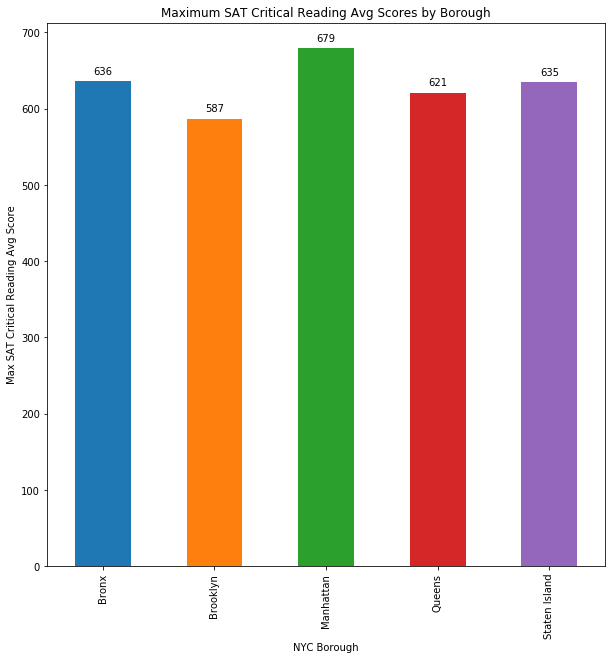

In [29]:
# generate bar graph comparing max SAT critical reading avg scores

# label bars with minimum SAT critical reading avg scores with no legend
ax = df_NYC_hs.groupby('borough').max().plot(y='SAT Critical Reading Avg. Score', kind='bar', legend=None, figsize=(10,10))

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# add title and lablels to the bar graph
ax.set_title('Maximum SAT Critical Reading Avg Scores by Borough')
ax.set_xlabel('NYC Borough')
ax.set_ylabel('Max SAT Critical Reading Avg Score')

# show plot
plt.show()

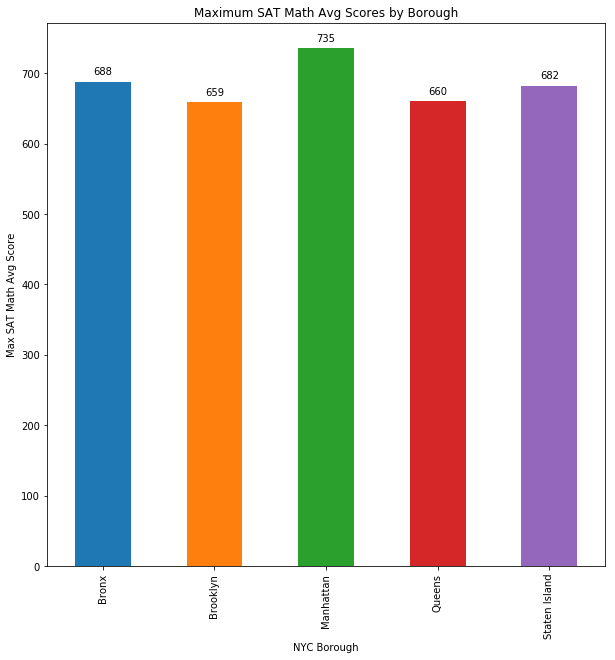

In [30]:
# generate bar graph comparing max SAT math avg scores

# label bars with minimum SAT math avg scores with no legend
ax = df_NYC_hs.groupby('borough').max().plot(y='SAT Math Avg. Score', kind='bar', legend=None, figsize=(10,10))

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# add title and lablels to the bar graph
ax.set_title('Maximum SAT Math Avg Scores by Borough')
ax.set_xlabel('NYC Borough')
ax.set_ylabel('Max SAT Math Avg Score')

# show plot
plt.show()

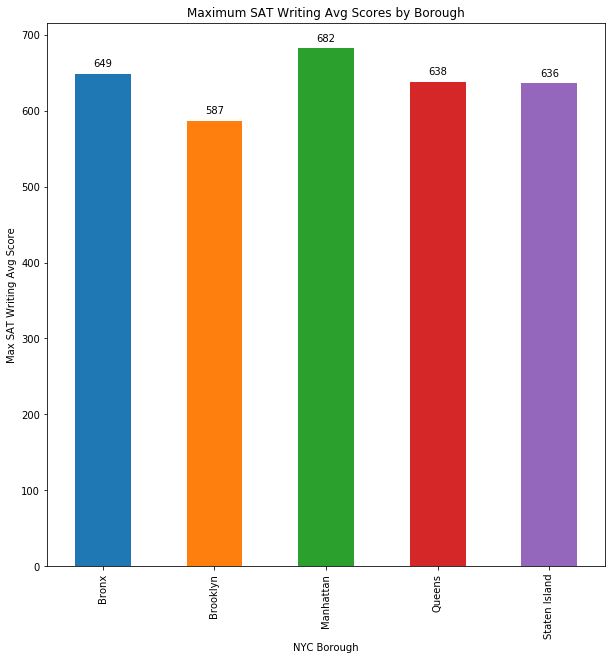

In [31]:
# generate bar graph comparing max SAT writing avg scores

# label bars with minimum SAT writing avg scores with no legend
ax = df_NYC_hs.groupby('borough').max().plot(y='SAT Writing Avg. Score', kind='bar', legend=None, figsize=(10,10))

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# add title and lablels to the bar graph
ax.set_title('Maximum SAT Writing Avg Scores by Borough')
ax.set_xlabel('NYC Borough')
ax.set_ylabel('Max SAT Writing Avg Score')

# show plot
plt.show()

In [32]:
# print max SAT critical reading avg score in NYC

df_max_read = df_NYC_hs.sort_values("SAT Critical Reading Avg. Score", axis=0, ascending=False)
df_max_read.head()


,dbn,schoolname,schooltype,borough,school_address,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
27,02M475,Stuyvesant High School,High School,Manhattan,"345 Chambers Street,New York,NY,10282",679,735,682
113,10X696,High School of American Studies at Lehman College,High School,Bronx,"2925 Goulden Avenue,Bronx,NY,10468",636,648,636
265,31R605,Staten Island Technical High School,High School,Staten Island,"485 Clawson Street,Staten Island,NY,10306",635,682,636
109,10X445,Bronx High School of Science,High School,Bronx,"75 West 205 Street,Bronx,NY,10468",632,688,649
2,01M696,Bard High School Early College,High School,Manhattan,"525 East Houston Street,New York,NY,10002",624,604,628


In [33]:
# print max SAT math avg score in NYC

df_max_math = df_NYC_hs.sort_values("SAT Math Avg. Score", axis=0, ascending=False)
df_max_math.head()

,dbn,schoolname,schooltype,borough,school_address,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
27,02M475,Stuyvesant High School,High School,Manhattan,"345 Chambers Street,New York,NY,10282",679,735,682
109,10X445,Bronx High School of Science,High School,Bronx,"75 West 205 Street,Bronx,NY,10468",632,688,649
265,31R605,Staten Island Technical High School,High School,Staten Island,"485 Clawson Street,Staten Island,NY,10306",635,682,636
243,28Q687,Queens High School for the Sciences at York Colle,High School,Queens,"94-50 159 Street,Jamaica,NY,11433",612,660,596
139,13K430,Brooklyn Technical High School,High School,Brooklyn,"29 Ft Greene Place,Brooklyn,NY,11217",587,659,587


In [34]:
# print max SAT writing avg score in NYC

df_max_writing = df_NYC_hs.sort_values("SAT Writing Avg. Score", axis=0, ascending=False)
df_max_writing.head()

,dbn,schoolname,schooltype,borough,school_address,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
27,02M475,Stuyvesant High School,High School,Manhattan,"345 Chambers Street,New York,NY,10282",679,735,682
109,10X445,Bronx High School of Science,High School,Bronx,"75 West 205 Street,Bronx,NY,10468",632,688,649
226,25Q525,Townsend Harris High School,High School,Queens,"149-11 Melbourne Avenue,Flushing,NY,11367",621,651,638
113,10X696,High School of American Studies at Lehman College,High School,Bronx,"2925 Goulden Avenue,Bronx,NY,10468",636,648,636
265,31R605,Staten Island Technical High School,High School,Staten Island,"485 Clawson Street,Staten Island,NY,10306",635,682,636


### Stuyvesant High School in Manhattan had the highest average scores in all three SAT categories-critical reading, writing and math. 

## Use Foursquare API to Review Information about Stuyvesant High School is in Manhattan

In [35]:
# generate results for schools in NYC

search_query = 'School'
radius = 500
LIMIT = 50

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [36]:
# get results for Manhattan

manhattan_results = requests.get(url).json()
manhattan_results

{'meta': {'code': 200, 'requestId': '5ef91ce144288466589b7414'},
 'response': {'venues': [{'id': '4d5ab621e2df60fc9f09d4e5',
    'name': 'Actors Studio Drama School',
    'location': {'address': '1 Pace Plz',
     'crossStreet': 'btwn Nassau & Gold St',
     'lat': 40.71159778861919,
     'lng': -74.00542733678141,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.71159778861919,
       'lng': -74.00542733678141}],
     'distance': 135,
     'postalCode': '10038',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['1 Pace Plz (btwn Nassau & Gold St)',
      'New York, NY 10038',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1ac941735',
      'name': 'College Theater',
      'pluralName': 'College Theaters',
      'shortName': 'Theater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/performingarts_theater_',
       'suffix': '.png'},
      'primary

In [37]:

stuy_id = '44e9fddaf964a520bb371fe3' # ID of Stuyvesant High School
stuy_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(stuy_id, CLIENT_ID, CLIENT_SECRET, VERSION)


In [38]:
result = requests.get(stuy_url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'venueRatingBlacklisted', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'description', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'popular', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


{'id': '44e9fddaf964a520bb371fe3',
 'name': 'Stuyvesant High School',
 'contact': {'phone': '2123124800',
  'formattedPhone': '(212) 312-4800',
  'twitter': 'stuyvesanthigh',
  'facebook': '112007138816093',
  'facebookName': 'Stuyvesant High School'},
 'location': {'address': '345 Chambers St',
  'crossStreet': 'at West St.',
  'lat': 40.717608879529976,
  'lng': -74.01320281198944,
  'labeledLatLngs': [{'label': 'display',
    'lat': 40.717608879529976,
    'lng': -74.01320281198944}],
  'postalCode': '10282',
  'cc': 'US',
  'city': 'New York',
  'state': 'NY',
  'country': 'United States',
  'formattedAddress': ['345 Chambers St (at West St.)',
   'New York, NY 10282',
   'United States']},
 'canonicalUrl': 'https://foursquare.com/v/stuyvesant-high-school/44e9fddaf964a520bb371fe3',
 'categories': [{'id': '4bf58dd8d48988d13d941735',
   'name': 'High School',
   'pluralName': 'High Schools',
   'shortName': 'High School',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/

In [39]:
# print description of Stuyvesant High School

print(result['response']['venue']['description'])

Stuyvesant High School has been a symbol of excellence in education for over a century. Our mission is to continue and enhance that commitment by providing an environment which will nurture and enhance the special academic talents of the students admitted to Stuyvesant.


In [40]:
# image of Stuvysant HS

Image(url='https://igx.4sqi.net/img/general/300x300/38328697_S_B8VwqQCwtw3nk5yV9kmFZy8_gUy09c7cfq5OTpHNw.jpg')

In [41]:
#@hidden_cell
# assign relevant part of JSON to venues
venues = results['response']['groups'][0]['items']

# tranform venues into a dataframe
dataframe = json_normalize(venues) # flatten json file


In [42]:
#@hidden_cell
# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]


## Map of Stuyvesant High School in Manhattan, NYC

In [43]:
#@hidden_cell

venues_map = folium.Map(location=[latitude, longitude], zoom_start=14) # generate map centred around Stuyvesant HS

# add Stuyvesant HS as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Stuyvesant High School',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

## Determine Top 5 SAT Performing High Schools for the Bronx

In [44]:
# generate dataframe for the Bronx

df_bronx = df_NYC_hs.loc[df_NYC_hs['borough'] == 'Bronx']
df_bronx

,dbn,schoolname,schooltype,borough,school_address,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
64,07X334,International Community High School,High School,Bronx,"345 Brook Avenue,Bronx,NY,10454",310,324,311
65,07X427,Community School for Social Justice,High School,Bronx,"350 Gerard Avenue,Bronx,NY,10451",361,359,357
66,07X473,Mott Haven Village Preparatory High School,High School,Bronx,"701 St. Anns Avenue,Bronx,NY,10455",351,375,371
67,07X495,University Heights Secondary School,High School,Bronx,"701 St. Anns Avenue,Bronx,NY,10455",403,394,404
68,07X520,Foreign Language Academy of Global Studies,High School,Bronx,"470 Jackson Avenue,Bronx,NY,10455",399,396,391
69,07X527,Bronx Leadership Academy II High School,High School,Bronx,"730 Concourse Village West,Bronx,NY,10451",362,378,363
70,07X547,New Explorers High School,High School,Bronx,"730 Concourse Village West,Bronx,NY,10451",367,356,361
71,07X548,Urban Assembly School for Careers in Sports,High School,Bronx,"730 Concourse Village West,Bronx,NY,10451",387,411,383
72,07X600,Alfred E. Smith Career and Technical Education...,High School,Bronx,"333 East 151 Street,Bronx,NY,10451",394,400,364
73,07X670,Health Opportunities High School,High School,Bronx,"350 Gerard Avenue,Bronx,NY,10451",363,368,364


In [45]:
# get SAT critical reading avg. score values in descending order in the Bronx

bronx_read = df_bronx[["borough","schoolname","SAT Critical Reading Avg. Score"]]
bronx_read.sort_values("SAT Critical Reading Avg. Score", ascending=False, inplace=True)
bronx_read.head()

C:\Users\PJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,borough,schoolname,SAT Critical Reading Avg. Score
113,Bronx,High School of American Studies at Lehman College,636
109,Bronx,Bronx High School of Science,632
86,Bronx,Bronx Center for Science and Mathematics,459
118,Bronx,Collegiate Institute for Math and Science,444
125,Bronx,Pelham Preparatory Academy,431


In [46]:
# get SAT writing avg. score values in descending order in the Bronx

bronx_write = df_bronx[["borough","schoolname","SAT Writing Avg. Score"]]
bronx_write.sort_values("SAT Writing Avg. Score", ascending=False, inplace=True)
bronx_write.head()

C:\Users\PJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,borough,schoolname,SAT Writing Avg. Score
109,Bronx,Bronx High School of Science,649
113,Bronx,High School of American Studies at Lehman College,636
86,Bronx,Bronx Center for Science and Mathematics,457
118,Bronx,Collegiate Institute for Math and Science,433
108,Bronx,"Celia Cruz Bronx High School of Music, The",427


In [47]:
# get SAT math avg. score values in descending order in the Bronx

bronx_math = df_bronx[["borough","schoolname","SAT Math Avg. Score"]]
bronx_math.sort_values("SAT Math Avg. Score", ascending=False, inplace=True)
bronx_math.head()

C:\Users\PJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,borough,schoolname,SAT Math Avg. Score
109,Bronx,Bronx High School of Science,688
113,Bronx,High School of American Studies at Lehman College,648
86,Bronx,Bronx Center for Science and Mathematics,480
118,Bronx,Collegiate Institute for Math and Science,471
125,Bronx,Pelham Preparatory Academy,438


### The Bronx High School of Science had the highest average scores for both writing and math and was a close second highest performer for critical reading. The highest performer for critical reading was High School of American Studies at Lehman College.

## Determine Top 5 SAT Performing High Schools for the Brooklyn

In [48]:
# generate dataframe for Brooklyn

df_brooklyn = df_NYC_hs.loc[df_NYC_hs['borough'] == 'Brooklyn']
df_brooklyn

,dbn,schoolname,schooltype,borough,school_address,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
136,13K350,Urban Assembly High School of Music and Art at...,High School,Brooklyn,"49 Flatbush Avenue Extension,Brooklyn,NY,11201",360,364,356
137,13K412,Brooklyn Community High School of Communication,High School,Brooklyn,"300 Willoughby Avenue,Brooklyn,NY,11205",375,355,384
138,13K419,Science Skills Center High School at Water's Edge,High School,Brooklyn,"49 Flatbush Avenue Extension,Brooklyn,NY,11201",399,417,395
139,13K430,Brooklyn Technical High School,High School,Brooklyn,"29 Ft Greene Place,Brooklyn,NY,11217",587,659,587
140,13K439,Brooklyn International High School at Water's ...,High School,Brooklyn,"49 Flatbush Avenue Extension,Brooklyn,NY,11201",305,364,312
141,13K483,The Urban Assembly School for Law and Justice,High School,Brooklyn,"283 Adams Street,Brooklyn,NY,11201",400,417,389
142,13K499,ACORN Community High School,High School,Brooklyn,"561 Grand Avenue,Brooklyn,NY,11238",384,364,368
143,13K595,Bedford Academy High School,High School,Brooklyn,"1119 Bedford Avenue,Brooklyn,NY,11216",438,443,431
144,13K605,George Westinghouse Career and Technical Educa...,High School,Brooklyn,"105 Johnson Street,Brooklyn,NY,11201",406,391,392
145,13K670,Benjamin Banneker Academy,High School,Brooklyn,"71-77 Clinton Avenue,Brooklyn,NY,11205",471,472,448


In [49]:
# get SAT critical reading avg. score values in descending order Brooklyn

brooklyn_read = df_brooklyn[["borough","schoolname","SAT Critical Reading Avg. Score"]]
brooklyn_read.sort_values("SAT Critical Reading Avg. Score", ascending=False, inplace=True)
brooklyn_read.head()

C:\Users\PJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,borough,schoolname,SAT Critical Reading Avg. Score
139,Brooklyn,Brooklyn Technical High School,587
147,Brooklyn,"Brooklyn Latin School, The",586
209,Brooklyn,Leon M. Goldstein High School for the Sciences,524
207,Brooklyn,Midwood High School,478
145,Brooklyn,Benjamin Banneker Academy,471


In [50]:
# get SAT writing avg. score values in descending order Brooklyn

brooklyn_write = df_brooklyn[["borough","schoolname","SAT Writing Avg. Score"]]
brooklyn_write.sort_values("SAT Writing Avg. Score", ascending=False, inplace=True)
brooklyn_write.head()

C:\Users\PJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,borough,schoolname,SAT Writing Avg. Score
139,Brooklyn,Brooklyn Technical High School,587
147,Brooklyn,"Brooklyn Latin School, The",570
209,Brooklyn,Leon M. Goldstein High School for the Sciences,542
207,Brooklyn,Midwood High School,476
202,Brooklyn,Edward R. Murrow High School,467


In [51]:
# get SAT math avg. score values in descending order Brooklyn

brooklyn_math = df_brooklyn[["borough","schoolname","SAT Math Avg. Score"]]
brooklyn_math.sort_values("SAT Math Avg. Score", ascending=False, inplace=True)
brooklyn_math.head()

C:\Users\PJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,borough,schoolname,SAT Math Avg. Score
139,Brooklyn,Brooklyn Technical High School,659
147,Brooklyn,"Brooklyn Latin School, The",584
209,Brooklyn,Leon M. Goldstein High School for the Sciences,561
207,Brooklyn,Midwood High School,519
146,Brooklyn,"CITY POLYTECHNIC HIGH SCHOOL OF ENGINEERING, A...",499


### Brooklyn Technical High School ranked the highest in all three categories, like Stuyvesant High School in Manhattan. The Brooklyn Latin School was the second highest ranking high school was the highest ranking in all categories coming in a close second in the critical reading and writing categories.

## Determine Top 5 SAT Performing High Schools for the Queens

In [52]:
# generate dataframe for Queens

df_queens = df_NYC_hs.loc[df_NYC_hs['borough'] == 'Queens']
df_queens

,dbn,schoolname,schooltype,borough,school_address,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
211,24Q264,Academy of Finance and Enterprise,High School,Queens,"30-20 Thomson Avenue,Long Island City,NY,11101",405,454,421
212,24Q267,High School of Applied Communication,High School,Queens,"30-20 Thomson Avenue,Long Island City,NY,11101",406,413,400
213,24Q293,Civic Leadership Academy,High School,Queens,"45-10 94Th Street,Elmhurst,NY,11373",404,429,407
214,24Q296,Pan American International High School,High School,Queens,"45-10 94Th Street,Elmhurst,NY,11373",317,323,311
215,24Q299,Bard High School Early College II,High School,Queens,"30-20 Thomson Avenue,Long Island City,NY,11101",545,568,550
216,24Q455,Newtown High School,High School,Queens,"48-01 90 Street,Elmhurst,NY,11373",383,440,380
217,24Q485,Grover Cleveland High School,High School,Queens,"21-27 Himrod Street,Ridgewood,NY,11385",395,420,396
218,24Q520,Middle College High School at LaGuardia Community,High School,Queens,"45-35 Van Dam Street,Long Island City,NY,11101",399,393,385
219,24Q530,International High School at LaGuardia Communi...,High School,Queens,"45-35 Van Dam Street,Long Island City,NY,11101",326,409,329
220,24Q550,High School for Arts and Business,High School,Queens,"105-25 Horace Harding Expy N,Corona,NY,11368",391,403,380


In [53]:
# get SAT critical reading avg. score values in descending order Queens

queens_read = df_queens[["borough","schoolname","SAT Critical Reading Avg. Score"]]
queens_read.sort_values("SAT Critical Reading Avg. Score", ascending=False, inplace=True)
queens_read.head()

C:\Users\PJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,borough,schoolname,SAT Critical Reading Avg. Score
226,Queens,Townsend Harris High School,621
243,Queens,Queens High School for the Sciences at York Colle,612
215,Queens,Bard High School Early College II,545
253,Queens,Frank Sinatra School of the Arts High School,504
256,Queens,Academy of American Studies,487


In [54]:
# get SAT math avg. score values in descending order Queens

queens_write = df_queens[["borough","schoolname","SAT Writing Avg. Score"]]
queens_write.sort_values("SAT Writing Avg. Score", ascending=False, inplace=True)
queens_write.head()

C:\Users\PJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,borough,schoolname,SAT Writing Avg. Score
226,Queens,Townsend Harris High School,638
243,Queens,Queens High School for the Sciences at York Colle,596
215,Queens,Bard High School Early College II,550
253,Queens,Frank Sinatra School of the Arts High School,494
256,Queens,Academy of American Studies,491


In [55]:
# get SAT math avg. score values in descending order Queens

queens_math = df_queens[["borough","schoolname","SAT Math Avg. Score"]]
queens_math.sort_values("SAT Math Avg. Score", ascending=False, inplace=True)
queens_math.head()

C:\Users\PJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,borough,schoolname,SAT Math Avg. Score
243,Queens,Queens High School for the Sciences at York Colle,660
226,Queens,Townsend Harris High School,651
215,Queens,Bard High School Early College II,568
228,Queens,Benjamin N. Cardozo High School,545
229,Queens,Francis Lewis High School,539


### Townsend Harris High School was the top performer for critical reading and writing and Queens High School for the Sciences at York College performed the highest for math. 

## Determine Top 5 SAT Performing High Schools for Staten Island

In [56]:
# generate dataframe for Staten Island

df_staten = df_NYC_hs.loc[df_NYC_hs['borough'] == 'Staten Island']
df_staten

,dbn,schoolname,schooltype,borough,school_address,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
257,31R047,CSI High School for International Studies,High School,Staten Island,"100 Essex Drive,Staten Island,NY,10314",452,451,450
258,31R064,Gaynor McCown Expeditionary Learning School,High School,Staten Island,"100 Essex Drive,Staten Island,NY,10314",398,412,385
259,31R440,New Dorp High School,High School,Staten Island,"465 New Dorp Lane,Staten Island,NY,10306",424,437,416
260,31R445,Port Richmond High School,High School,Staten Island,"85 St Josephs Avenue,Staten Island,NY,10302",424,438,417
261,31R450,Curtis High School,High School,Staten Island,"105 Hamilton Avenue,Staten Island,NY,10301",437,435,429
262,31R455,Tottenville High School,High School,Staten Island,"100 Luten Avenue,Staten Island,NY,10312",462,486,470
263,31R460,Susan E. Wagner High School,High School,Staten Island,"1200 Manor Road,Staten Island,NY,10314",455,474,459
264,31R600,Ralph R. McKee Career and Technical Education ...,High School,Staten Island,"290 St Marks Place,Staten Island,NY,10301",416,422,397
265,31R605,Staten Island Technical High School,High School,Staten Island,"485 Clawson Street,Staten Island,NY,10306",635,682,636


In [57]:
# get SAT critical reading avg. score values in descending order in Staten Island

staten_read = df_staten[["borough","schoolname","SAT Critical Reading Avg. Score"]]
staten_read.sort_values("SAT Critical Reading Avg. Score", ascending=False, inplace=True)
staten_read.head()

C:\Users\PJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,borough,schoolname,SAT Critical Reading Avg. Score
265,Staten Island,Staten Island Technical High School,635
262,Staten Island,Tottenville High School,462
263,Staten Island,Susan E. Wagner High School,455
257,Staten Island,CSI High School for International Studies,452
261,Staten Island,Curtis High School,437


In [58]:
# get SAT writing avg. score values in descending order in Staten Island

staten_write = df_staten[["borough","schoolname","SAT Writing Avg. Score"]]
staten_write.sort_values("SAT Writing Avg. Score", ascending=False, inplace=True)
staten_write.head()

C:\Users\PJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,borough,schoolname,SAT Writing Avg. Score
265,Staten Island,Staten Island Technical High School,636
262,Staten Island,Tottenville High School,470
263,Staten Island,Susan E. Wagner High School,459
257,Staten Island,CSI High School for International Studies,450
261,Staten Island,Curtis High School,429


In [59]:
# get SAT math avg. score values in descending order in Staten Island

staten_math = df_staten[["borough","schoolname","SAT Math Avg. Score"]]
staten_math.sort_values("SAT Math Avg. Score", ascending=False, inplace=True)
staten_math.head()

C:\Users\PJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,borough,schoolname,SAT Math Avg. Score
265,Staten Island,Staten Island Technical High School,682
262,Staten Island,Tottenville High School,486
263,Staten Island,Susan E. Wagner High School,474
257,Staten Island,CSI High School for International Studies,451
260,Staten Island,Port Richmond High School,438


### Staten Island Technical School outperformed the other high schools in all three categories. 

## Conclusion

### Analyzing SAT average scores in New York City, yielded some interesting insights. Manhattan had the top performing high school in all three SAT categories, Stuyvesant High School. On the other end of the spectrum, Brooklyn had the lowest average scoring high school in all three SAT categories. 

### Three out of the five boroughs - Manhattan, Brooklyn and Staten Island - had the same high school as the top performer in all of the SAT categories. Most of the boroughs had two high schools that were the top performers in all three SAT categories. 

### Staten Island was the only borough whose top performing high school outperformed the second highest performing high school. 